# Домашнее задание 2

1. В чём различие между зависимыми и независимыми выборками?

Выборки считаются **зависимыми**, если между элементами выборок можно установить взаимно однозначное соответствие. Примером зависимых выборок является измерение какого-либо признака до и после эксперимента в определённой группе, либо исследование, проведенное для мужей и жен. В **независимых** выборках элементы не связаны между собой. Примером независимой выборки может быть изучение влияния признака для мужчин и женщин или для пловцов и космонавтов. Также можно отметить, что зависимые выборки всегда имеют одинаковый размер, для независимых этот параметр может различаться.

2. Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги?

**Параметрические** статистические критерии основаны на том, что распределение данных известно. Большинство из них предполагает нормальность распределения, поэтому необходимо проверять справедливость этого утверждения перед их применением. В случае, когда предпосылки по распределению не выполняются необходимо использовать непараметрические тесты.
**Непараметрические** статистические критерии чаще всего исходят из того, что распределение данных неизвестно. Поэтому при использовании этих критериев часто действия производятся не с самими значениями, а с их рангами. Также распространено применение этих тестов в случаях небольших выборок или наличия выбросов. Проблема с их применением заключается в том, что они имеют меньшую статистическую мощность, чем параметрические аналоги. 

### Дополнительное задание для работы с курсовым проектом

1. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [5]:
df = pd.read_csv('../L1/train_crime.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Добавим описание признаков:

- __Dates__ - timestamp of the crime incident
- __Category__ - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
- __Descript__ - detailed description of the crime incident (only in train.csv)
- __DayOfWeek__ - the day of the week
- __PdDistrict__ - name of the Police Department District
- __Resolution__ - how the crime incident was resolved (only in train.csv)
- __Address__ - the approximate street address of the crime incident 
- __X__ - Longitude
- __Y__ - Latitude


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [7]:
df['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

Отсюда видно, что целевая переменная является качественной, так же как и большинство остальных признаков в данном наборе. Значит матрицу корреляций между целевой переменной и признаками в данном случае нельзя построить. По-настоящему количественными переменными для исследуемых данных являются только координаты места совершения преступления. Посчитаем корреляцию между этими признаками, хотя по-моему мнению она вряд ли может послужить основой для каких-либо дальнейшех выводов.

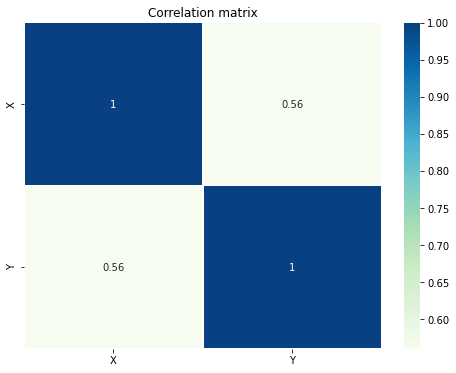

In [8]:
plt.figure(figsize=(8, 6))

corr_matrix = df[['X', 'Y']].corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

2. Сравните распределения признаков из train.csv и test.csv

In [9]:
test = pd.read_csv('../L1/test_crime.csv')
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


Так как нам неизвестно распределение вещественных переменных __X__ и __Y__ воспользуемся непараметрическим критерием Манна-Уитни.

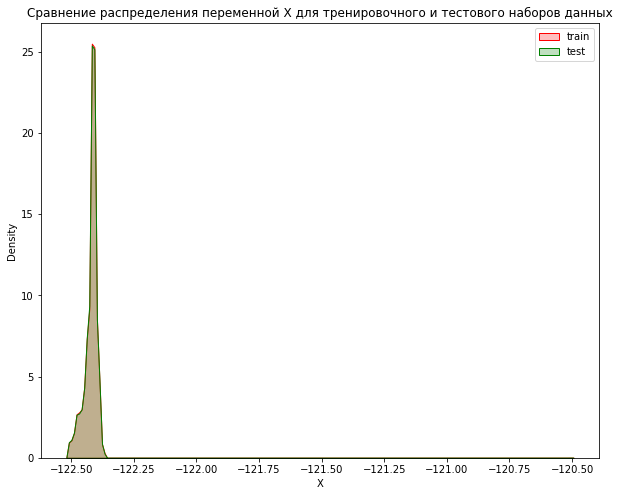

MannwhitneyuResult(statistic=387366757677.5, pvalue=0.006119629205460879)


In [10]:
plt.figure(figsize=(10, 8))
sns.kdeplot(df['X'], shade=True, label='train', color='r')
sns.kdeplot(test['X'], shade=True, label='test', color='g')
plt.title('Сравнение распределения переменной X для тренировочного и тестового наборов данных')
plt.legend()
plt.show()
print(mannwhitneyu(df['X'], test['X']))

Полученное значени __p-value__ указывает, что гипотеза о равенстве математических ожиданий наборов данных отвергается. Это означает, что не следует сильно полагаться на значение __X__ для предсказания целевой переменной, так как значения данного признака для тестового набора статистически значимо отличаются от тех, на которых будет происходить обучение. Стоит преобразовать данный признак, чтобы его можно было использовать с большей пользой.

In [11]:
print(f'train X mean:', round(df['X'].mean(), 8))
print(f'test X mean:', round(test['X'].mean(), 8))

train X mean: -122.42261646
test X mean: -122.42269319


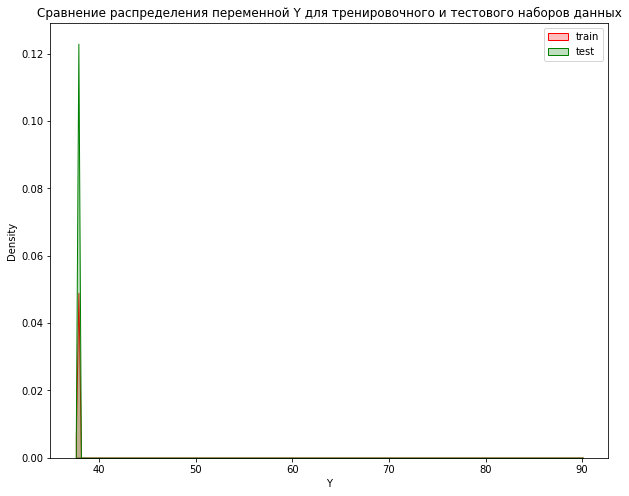

MannwhitneyuResult(statistic=387732112775.5, pvalue=0.07734106023546146)


In [12]:
plt.figure(figsize=(10, 8))
sns.kdeplot(df['Y'], shade=True, label='train', color='r')
sns.kdeplot(test['Y'], shade=True, label='test', color='g')
plt.title('Сравнение распределения переменной Y для тренировочного и тестового наборов данных')
plt.legend()
plt.show()
print(mannwhitneyu(df['Y'], test['Y']))

Здесь полученное __p-value__ не позволяет отвергнуть гипотезу о равенстве математических ожиданий данного признака в тренировочном и тестовом наборах.

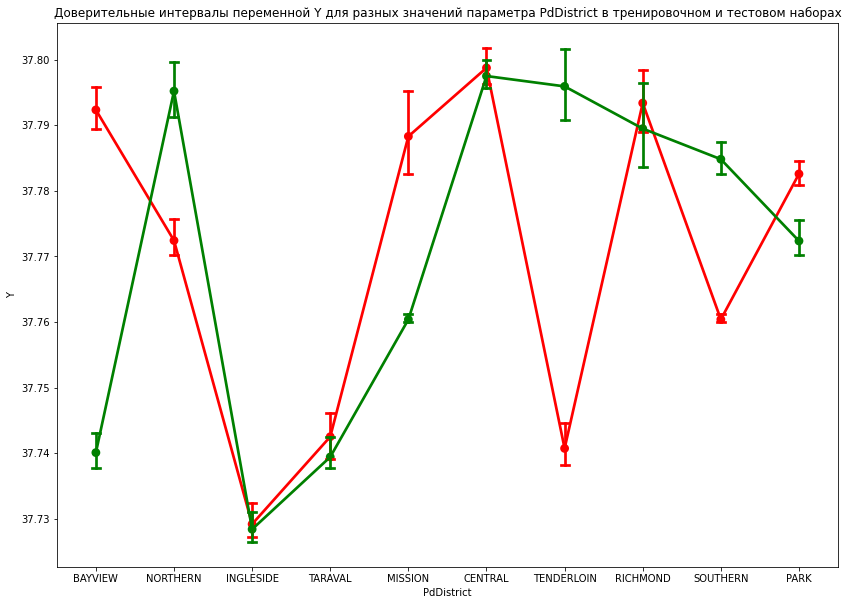

In [13]:
plt.figure(figsize=(14,10))
sns.pointplot(x='PdDistrict', y='Y', data=df, capsize=.1, label='train', color='r')
sns.pointplot(x='PdDistrict', y='Y', data=test, capsize=.1, label='test', color='g')
plt.title('Доверительные интервалы переменной Y для разных значений параметра PdDistrict в тренировочном' 
          f' и тестовом наборах')
plt.show()

Видно, что для некоторых районов значения широты в тренировочном и тестовом наборах данных заметно отличаются. Это может представлять проблему при обучении и дальнейшем прогнозировании.

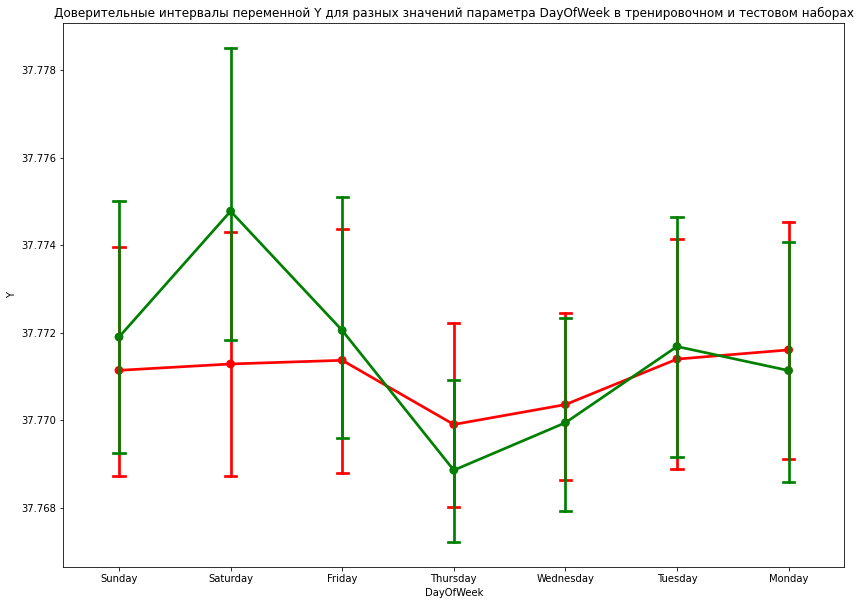

In [14]:
plt.figure(figsize=(14,10))
sns.pointplot(x='DayOfWeek', y='Y', data=df, capsize=.1, label='train', color='r')
sns.pointplot(x='DayOfWeek', y='Y', data=test, capsize=.1, label='test', color='g')
plt.title('Доверительные интервалы переменной Y для разных значений параметра DayOfWeek в тренировочном' 
          f' и тестовом наборах')
plt.show()

Для дней недели подобной проблемы не наблюдается.

3. Поизучайте значения на категориальных признаках и попробуйте сократить кол-во уникальных значений

In [15]:
df['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [16]:
df['PdDistrict'].nunique()

10

In [17]:
df['Address'].value_counts()

800 Block of BRYANT ST            26533
800 Block of MARKET ST             6581
2000 Block of MISSION ST           5097
1000 Block of POTRERO AV           4063
900 Block of MARKET ST             3251
                                  ...  
BECKETT ST / JACKSON ST               1
800 Block of JOHN F KENNEDY DR        1
GAMBIER ST / SILLIMAN ST              1
0 Block of SACRAMENTO ST              1
OCEAN AV / WANDA ST                   1
Name: Address, Length: 23228, dtype: int64

In [18]:
df['Address'].nunique()

23228

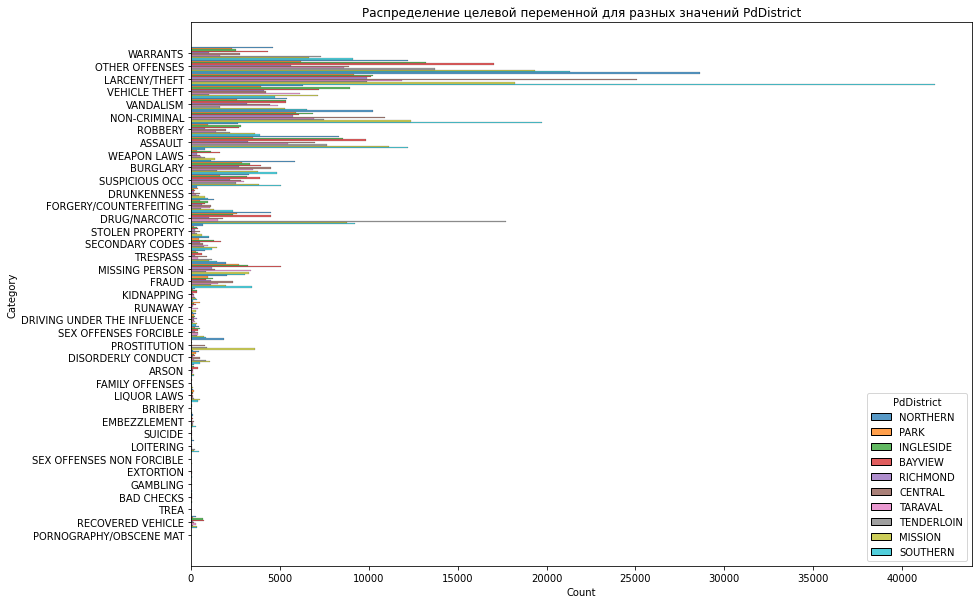

In [19]:
plt.figure(figsize=(14,10))
sns.histplot(y='Category', hue='PdDistrict', data=df, multiple='dodge')
plt.title('Распределение целевой переменной для разных значений PdDistrict')
plt.show()

Возможно можно попробовать объединить некоторые районы в один. Например, на первый взгляд распределение целевой переменной для `Southern` и `BayView` выглядит схожим. С другой стороны видно уникальность района `Mission`. Однако потребуется более детальный анализ.

Аналогичный подход можно использовать для объединения адресов в переменной __Address__ внутри одного района.